In [2]:
import esma

In [3]:
model = esma.project(project_id='Fe')

In [4]:
model.get_structure(format='poscar',name='Fe.poscar',path='./Structures') #Load structure
model.set_pseudo("US")
model.set_cores(8)
model.ecutwfc(60) #Set wavefunction cutoff
model.k_points(6) #Set number of k points
model.degauss(0.05) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.set_pseudo("US")
model.ecutrho(360)  

In [6]:
models = model.magnetize(magnetic_atom='Fe')

In [7]:
for i,state in enumerate(models):
    #Adjust parameters
    state.calculate('vc-relax')
    state.get_structure('vc-relax') #Get vc-relaxed structure
    state.calculate('scf')

vc-relax for fm is started
vc-relax for fm is finished
scf for fm is started
scf for fm is finished
vc-relax for afm1 is started
vc-relax for afm1 is finished
scf for afm1 is started
scf for afm1 is finished


In [8]:
ground_state = esma.minimum_energy(models)

FM


nscf for fm is started
nscf for fm is finished
dos for fm is started
dos for fm is finished


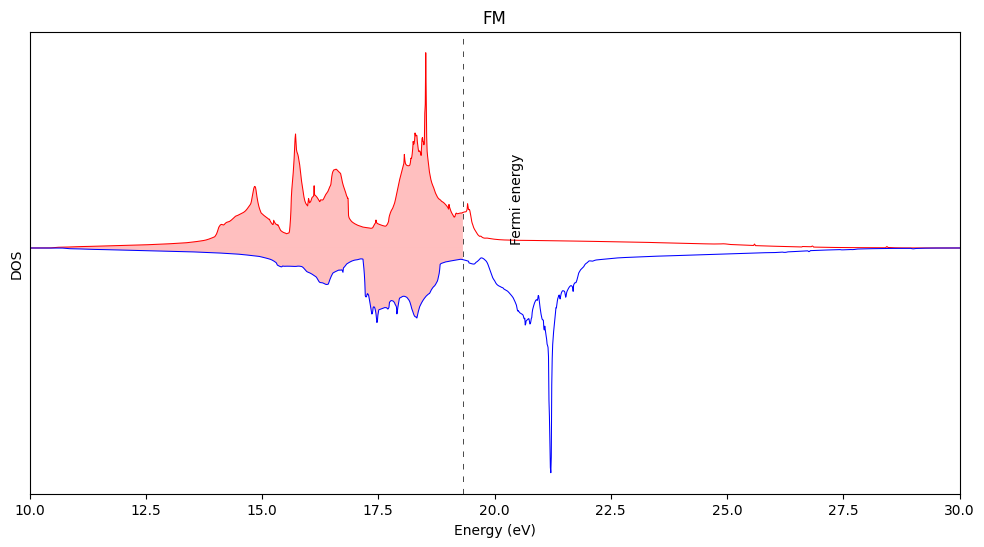

In [9]:
ground_state.occupations('tetrahedra')
ground_state.k_points(12)
ground_state.calculate('nscf')
ground_state.dos(emin=-20,emax=30)
ground_state.calculate('dos')
ground_state.plot('dos',xlim=[-20,30]) #plot dos